<a href="https://colab.research.google.com/github/ark150/PracticaSIDI2Semana1/blob/master/sistdist2_semana3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Repaso semana 2
la mayoria de los datos de los cuales se quiere sacar cierta informacion, por su gran volumen tienden a usar muchos recursos en los cuales se puede dividir el trabajo de manera que estos sean menos costoso.


codigo reutilizable

In [0]:
import numpy as np
import pandas as pd
import psutil, os
from time import time
def huella_de_memoria():
  '''regresa la memoria usada por un proceso en python'''
  mem= psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

comando para obtener achivos

In [0]:
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/'+plantilla
comandos= [plantillaURL.format(y) for y in range(1,13)]
for cmd in comandos:
  os.system(cmd)

In [0]:
from math import sqrt

x=4

y=h(x)

z=g(y)

w=f(z)

w=?

In [0]:
def f(z):
  return sqrt(z +4)

def g(y):
  return y-3

def h(x):
  return x**2


In [0]:
x= 4
y=h(x)
z=g(y)
w=f(z)

In [0]:
print(w)

4.123105625617661


In [0]:
print(f(g(h(x)))) #composicion de funciones

4.123105625617661


In [0]:
data=[1, 2, 3, 4, 5]

In [0]:
for x in data:
  print(f(g(h(x))))

1.4142135623730951
2.23606797749979
3.1622776601683795
4.123105625617661
5.0990195135927845


In [0]:
%%time
[f(g(h(x))) for x in data] # comprension de listas

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 14.8 µs


[1.4142135623730951,
 2.23606797749979,
 3.1622776601683795,
 4.123105625617661,
 5.0990195135927845]

la lista anterior se genera secuencialmente, como la podemos generar en forma paralela?


In [0]:
from dask import delayed

In [0]:
x=4
y = delayed(h)(x) 
z=delayed(g)(y)
w=delayed(f)(z)

In [0]:
print(w)

Delayed('f-3585c13f-0bab-46b6-bc8c-e2f79f374568')


In [0]:
type(w)

dask.delayed.Delayed

In [0]:
w.compute()

4.123105625617661

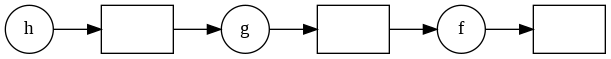

In [0]:
w.visualize(rankdir='LR')

In [0]:
def f(x):
  return sqrt(x+4)
f= delayed(f)

In [0]:
@delayed
def f(x):
  return sqrt(x+4)

print(type(f))

<class 'dask.delayed.DelayedLeaf'>


ejemplo usando decoradores

In [0]:
data

[1, 2, 3, 4, 5]

In [0]:
output = []
for x in data:
  a= incrementa(x)
  b=dobla(x)
  c=suma(a, b)
  output.append(c)

In [0]:
type(output)

list

In [0]:
output

[Delayed('suma-fa8910ed-25cb-4bde-9a5c-6831ebbf9674'),
 Delayed('suma-353056f0-bfc9-4858-9632-a615bddd675d'),
 Delayed('suma-b2ceae9d-46f6-4fac-8bb8-1f5890f1e488'),
 Delayed('suma-f1505989-efd3-45ae-9fce-352ab3df393e'),
 Delayed('suma-ecd04527-fd2a-4a52-8a7f-b02204dfac02')]

In [0]:
total= sum(output)
type(total)

dask.delayed.Delayed

In [0]:
total.visualize(rankdir='LR')

In [0]:
sum([res.compute() for res in output])

50

In [0]:
total.compute()

50

In [0]:
#@delayed
def incrementa(x):
  return x+1

#@delayed
def dobla(x):
  return 2*x

#@delayed
def suma(x, y):
  return x+y


In [0]:
type(suma)

function

In [0]:
%%time
a=delayed(incrementa)(1)
b=delayed(dobla)(2)
c=delayed(suma)(a, b)


CPU times: user 613 µs, sys: 137 µs, total: 750 µs
Wall time: 618 µs


In [0]:
%%time
c.compute()

CPU times: user 1.69 ms, sys: 1.17 ms, total: 2.86 ms
Wall time: 2.48 ms


6

In [0]:
import numpy as np
import pandas as pd
import psutil, os
from time import time
def huella_de_memoria():
  '''regresa la memoria usada por un proceso en python'''
  mem= psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

In [0]:
from time import sleep
def inc(x):
  sleep(1)
  return x+1

In [0]:
%%time
res = []
for x in data:
  y= inc(x)
  res.append(y)

total = sum(res)

CPU times: user 4.8 ms, sys: 3.5 ms, total: 8.3 ms
Wall time: 5.01 s


In [0]:
%%time 
res = []
for x in data:
  y= delayed(inc)(x)
  res.append(y)

total = delayed(sum)(res)
total.compute()


CPU times: user 11.5 ms, sys: 1.55 ms, total: 13.1 ms
Wall time: 3.02 s


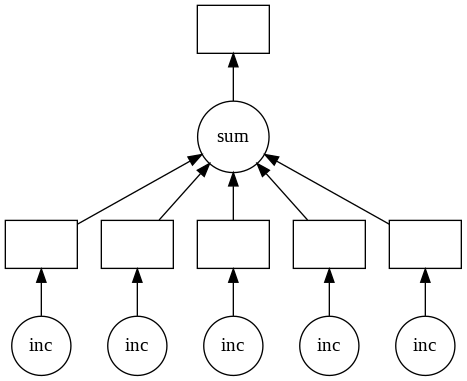

In [0]:
total.visualize()

calcular el calculo siguiente entre generadores y usando delayed

In [0]:
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/'+plantilla
comandos= [plantillaURL.format(y) for y in range(1,13)]
for cmd in comandos:
  os.system(cmd)

In [0]:
@delayed
def cuenta_viajes_tardados(df):
  df['duracion'] =(df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds
  es_viaje_tardado = df.duracion > 1200
  result_dict = {'n_long': [sum(es_viaje_tardado)],
                'n_total': [len(df)]}
  return pd.DataFrame(result_dict)

@delayed
def abre_archivo(nombre):
  return pd.read_csv(nombre, parse_dates=[1,2])

In [0]:
archivos = (plantilla.format(y) for y in range(1,7))

In [0]:
totales= (cuenta_viajes_tardados(abre_archivo(archivo)) for archivo in archivos)

In [0]:
semi_anuales = sum(totales)

In [0]:
%%time
semi_anuales.compute()

CPU times: user 3min 28s, sys: 12.9 s, total: 3min 40s
Wall time: 4min 1s


,n_long,n_total
0,10954358,53925735


# arreglos y matrices usando dask


In [0]:
import numpy as np

In [0]:
a= np.random.rand(10000)

In [5]:
print(a.shape, a.dtype, a.nbytes)

(10000,) float64 80000


In [6]:
a.sum()

4977.7777339229415

In [7]:
a.mean()

0.4977777733922941

In [0]:
import dask.array as da

In [0]:
a_dask = da.from_array(a, chunks=len(a)//6)

In [10]:
type(a_dask)

dask.array.core.Array

In [24]:
a_dask.chunks

((1111, 1111, 1111, 1111, 1111, 1111, 1111, 1111, 1111, 1),)

In [0]:
n_chunks=8
chunk_size=len(a)// n_chunks
result=0


In [0]:
for k in range(n_chunks):
  offset = k*chunk_size
  a_chunk = a[offset:offset+chunk_size]
  result += a_chunk.sum()
  

In [14]:
print(result)

4977.7777339229415


In [15]:
a.sum()

4977.7777339229415

In [0]:
result_dask = a_dask.sum()

In [35]:
result_dask

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=()>

In [36]:
result_dask.compute()

4977.7777339229415

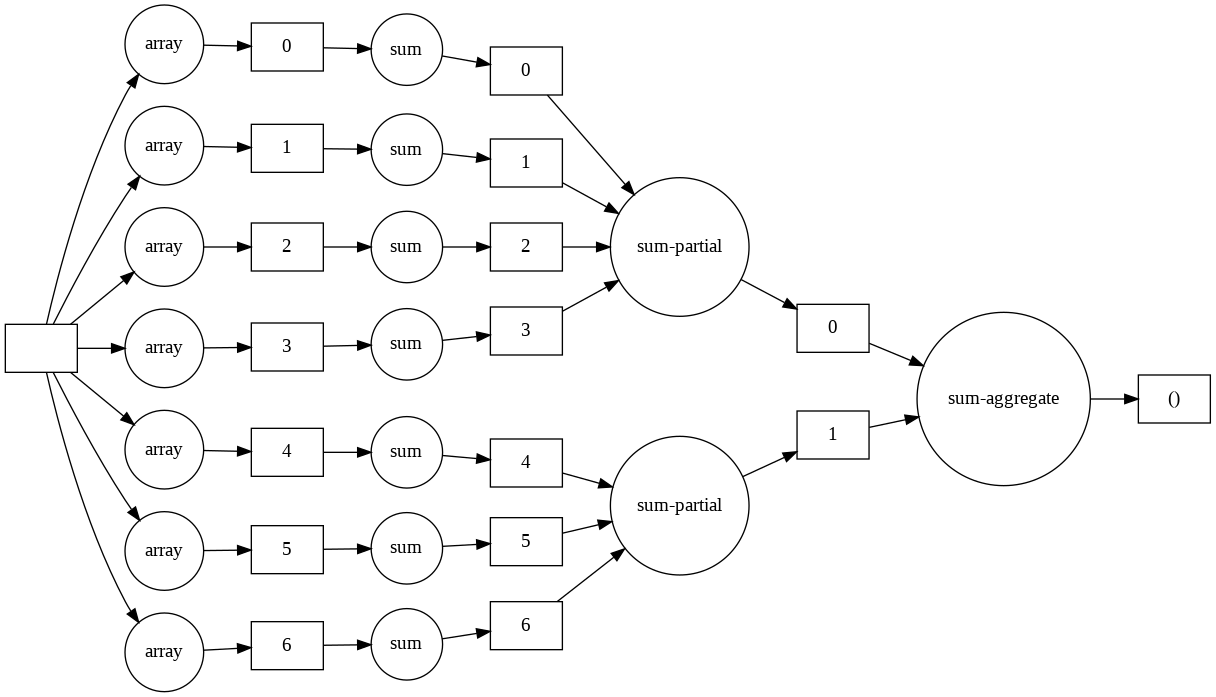

In [37]:
result_dask.visualize(rankdir='LR')

tarea cuantificar tiempos, y como se veria modificada la tabla si se divide de otra forma

medir el tiempo de computo sobre arreglos

In [28]:
!wget https://www.gw-osc.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5

--2019-05-27 21:57:38--  https://www.gw-osc.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5
Resolving www.gw-osc.org (www.gw-osc.org)... 131.215.125.179
Connecting to www.gw-osc.org (www.gw-osc.org)|131.215.125.179|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gw-openscience.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5 [following]
--2019-05-27 21:57:38--  https://www.gw-openscience.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.125.179
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.125.179|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5/ [following]
--2019-05-27 21:57:38--  https://www.gw-openscience.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5/
Reusing existing connection t

In [0]:
!cp H-H1_LOSC_4_V1-815411200-4096.hdf5 LIGO_data.hdf5

In [0]:
import h5py, time

In [2]:
ls

H-H1_LOSC_4_V1-815411200-4096.hdf5  yellow_tripdata_2018-05.csv
LIGO_data.hdf5                      yellow_tripdata_2018-06.csv
mydask.png                          yellow_tripdata_2018-07.csv
sample_data/                        yellow_tripdata_2018-08.csv
yellow_tripdata_2018-01.csv         yellow_tripdata_2018-09.csv
yellow_tripdata_2018-02.csv         yellow_tripdata_2018-10.csv
yellow_tripdata_2018-03.csv         yellow_tripdata_2018-11.csv
yellow_tripdata_2018-04.csv         yellow_tripdata_2018-12.csv


In [5]:
datos= h5py.File('./LIGO_data.hdf5')
type(datos)

h5py._hl.files.File

In [6]:
for key in datos.keys():
  print(key)

meta
quality
strain


In [0]:
with h5py.File('./LIGO_data.hdf5') as dset:
  strain =dset['strain']['Strain'][:]

In [8]:
strain.shape

(16777216,)

In [0]:
strain_dask8 = da.from_array(strain, chunks=strain.shape[0]//8)

In [12]:
ti = time.time()
promedio8= strain_dask8.mean().compute()
tf = time.time()
print('tiempo transcurrido: {} ms'.format((tf-ti)*1000))

tiempo transcurrido: 97.98026084899902 ms


In [2]:
promedio8

NameError: ignored

medir el tiempo de ejecucion anterio usando como chunks de arreglo de dask 2,4,8,16,32 y comparara con los mismos usando numpy

In [13]:
strain_dask8.chunks

((2097152, 2097152, 2097152, 2097152, 2097152, 2097152, 2097152, 2097152),)

In [14]:
strain[0:2097152].mean()
strain[2097152:2*2097152].mean()

-1.2622019494042042e-20